In [5]:
from drought.data import aggregator
import drought.data.df_extensions as dfext
import spei as si
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Obtain data needed to calculate SPEI - Precipitation and PET

In [9]:
# We have monthly data from 2001-2023 saved on a 50 km resolution
monthly = pd.read_csv('../../data/interim/all_climate_monthly_mean_5000_scale_2001_to_2023.csv', index_col=0)
monthly

,month,polygon_id,year,datetime,date,precipitation,radiation,temperature,fpar,PET,P-PET
0,1,1,2001,2001-01-01,01-01,287.395210,1.444521e+07,28.270778,88.894826,176.270066,111.125144
1,1,1,2002,2002-01-01,01-02,156.436205,1.615154e+07,29.185926,89.622120,207.440509,-51.004304
2,1,1,2003,2003-01-01,01-03,192.224859,1.589504e+07,29.337065,89.497615,178.266904,13.957954
3,1,1,2004,2004-01-01,01-04,124.213303,1.687764e+07,29.124262,89.349133,184.652791,-60.439488
4,1,1,2005,2005-01-01,01-05,168.052640,1.612343e+07,28.732862,89.272441,175.966823,-7.914183
...,...,...,...,...,...,...,...,...,...,...,...
2107,12,8,2018,2018-12-01,12-18,204.183599,1.699328e+07,30.129621,69.579149,250.800548,-46.616949
2108,12,8,2019,2019-12-01,12-19,102.111351,1.882574e+07,32.419237,60.315467,253.403838,-151.292487
2109,12,8,2020,2020-12-01,12-20,33.831942,2.017654e+07,29.424621,67.737927,274.013432,-240.181489
2110,12,8,2021,2021-12-01,12-21,426.831726,1.296895e+07,28.630775,62.093750,232.133668,194.698058


## Calculate spei per polygon

In [11]:
# Calculate water deficit
monthly['P-PET'] = monthly.precipitation - monthly.PET

In [10]:
monthly = dfext.add_datetime_column(monthly).set_index('datetime')

In [11]:
def calculate_spei(df, periods=[1, 3, 6, 9, 12, 18]):
    speis = []
    for polygon_id in range(1, 9):
        polygon = df[df.polygon_id==polygon_id]
        for period in periods:
            polygon[f'spei_{period}'] = si.si.spei(polygon['P-PET'].sort_index().rolling(period).sum().dropna())
        speis.append(polygon)
    return pd.concat(speis)

In [12]:
spei_data = calculate_spei(monthly)

In [55]:
spei_data.to_csv('../../data/interim/2001-2023_spei_per_polygon_50km_climate_resolution.csv')

<AxesSubplot: >

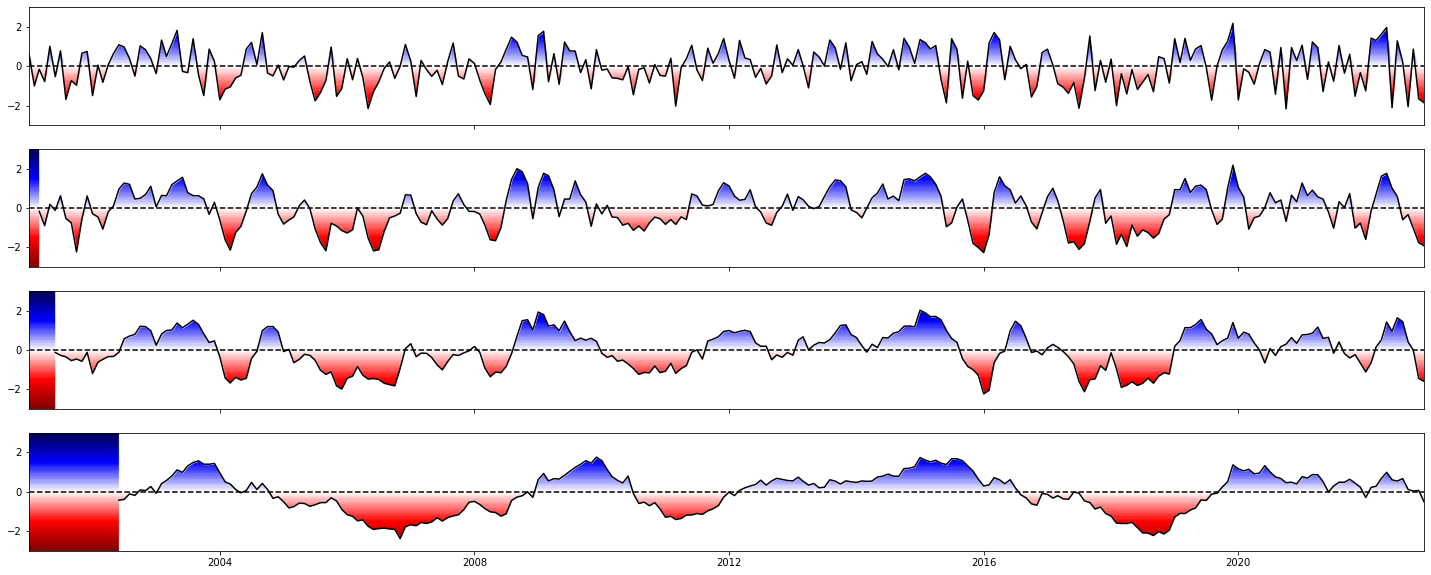

In [53]:
polygon_id = 1
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

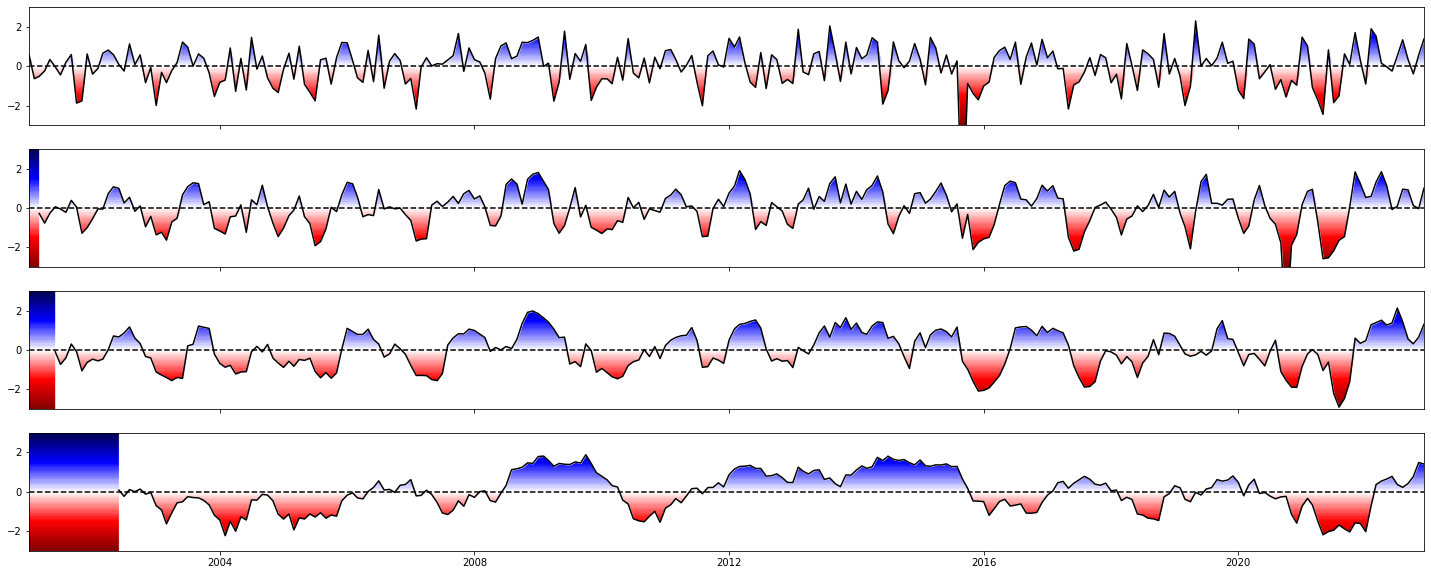

In [54]:
polygon_id = 2
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

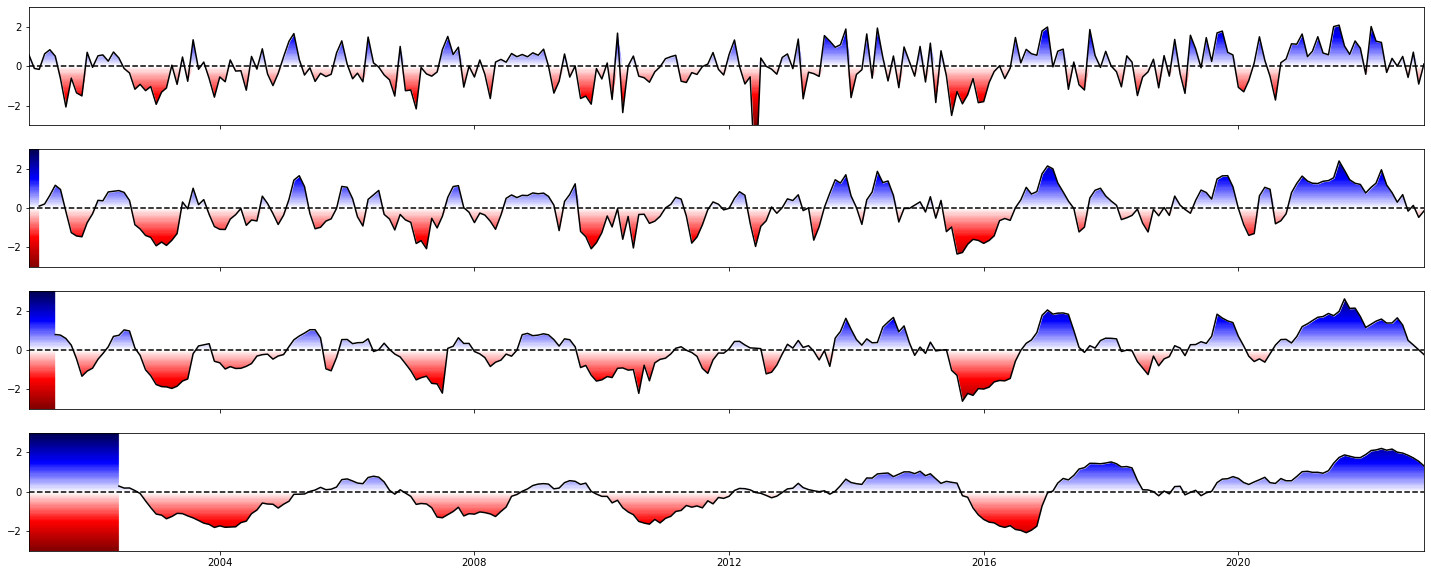

In [59]:
polygon_id = 3
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

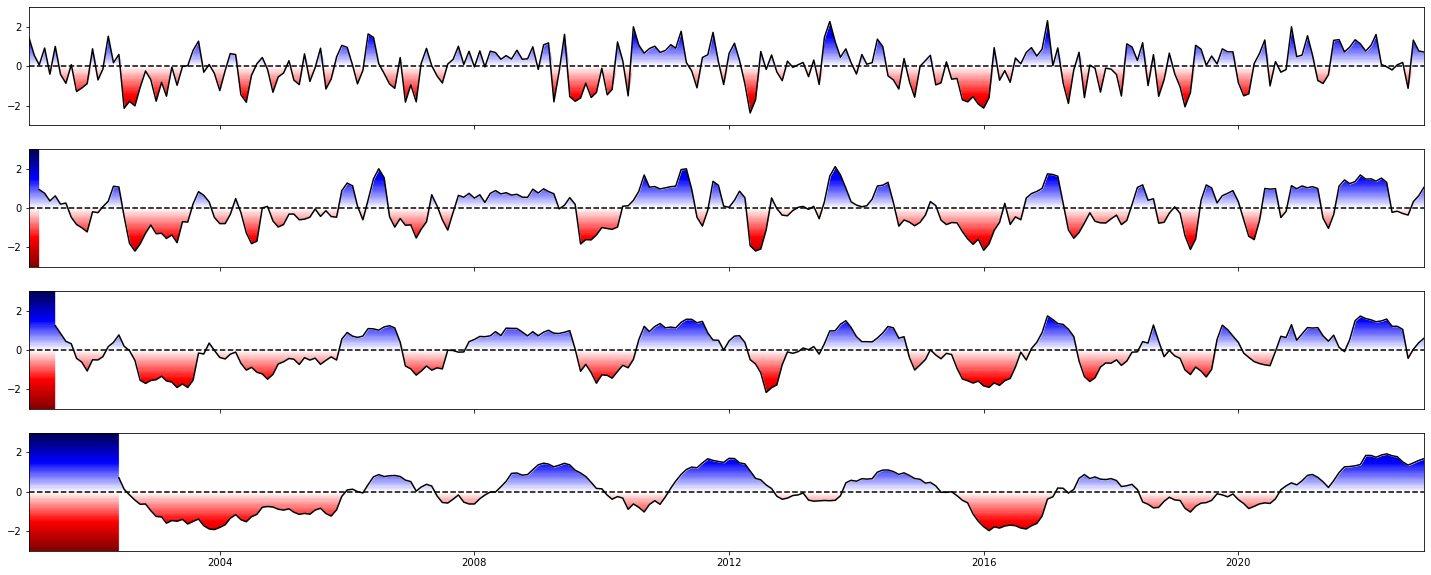

In [60]:
polygon_id = 4
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

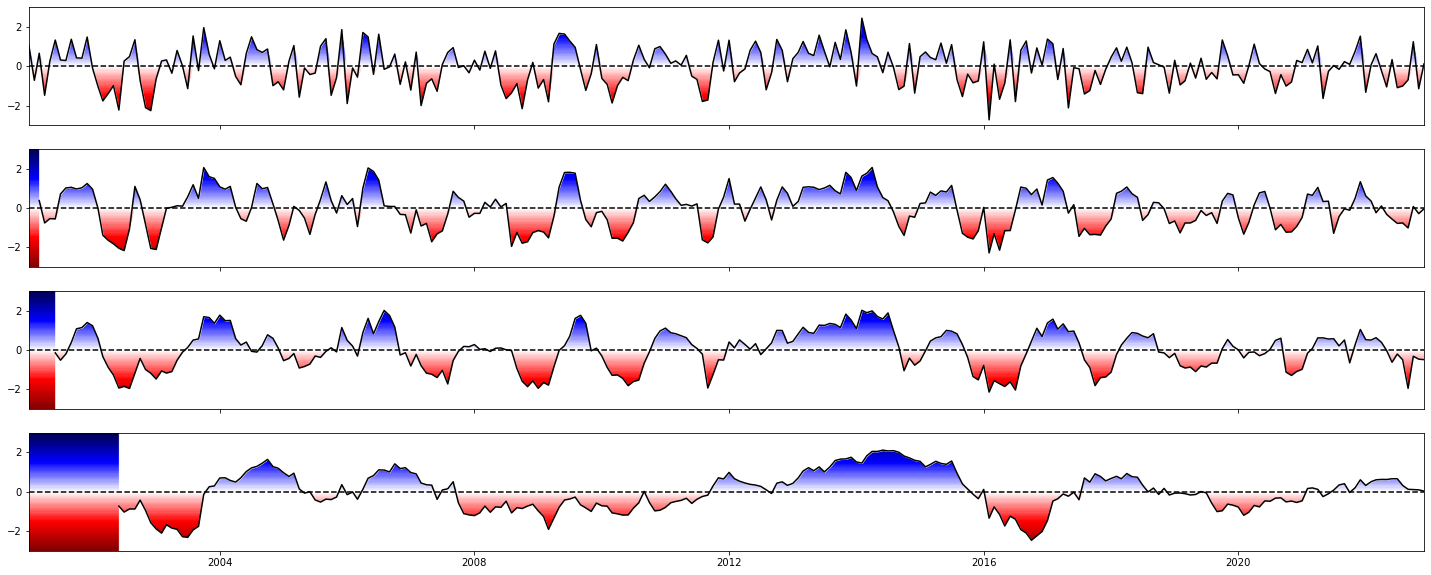

In [61]:
polygon_id = 5
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

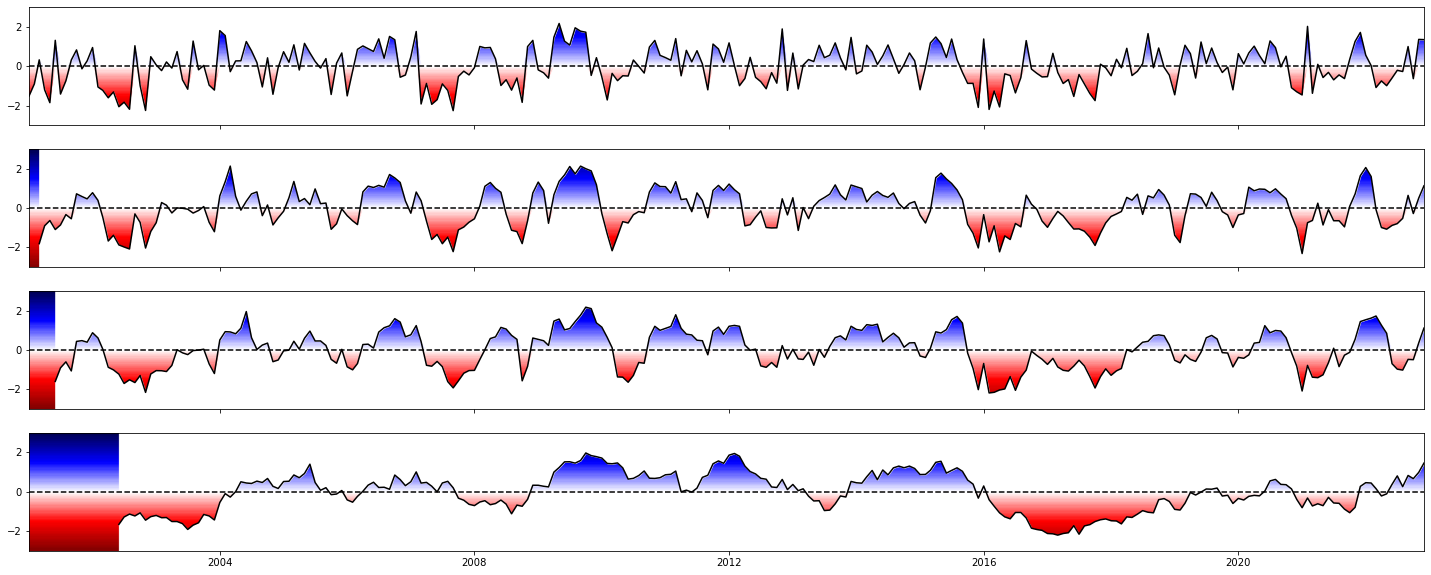

In [62]:
polygon_id = 6
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

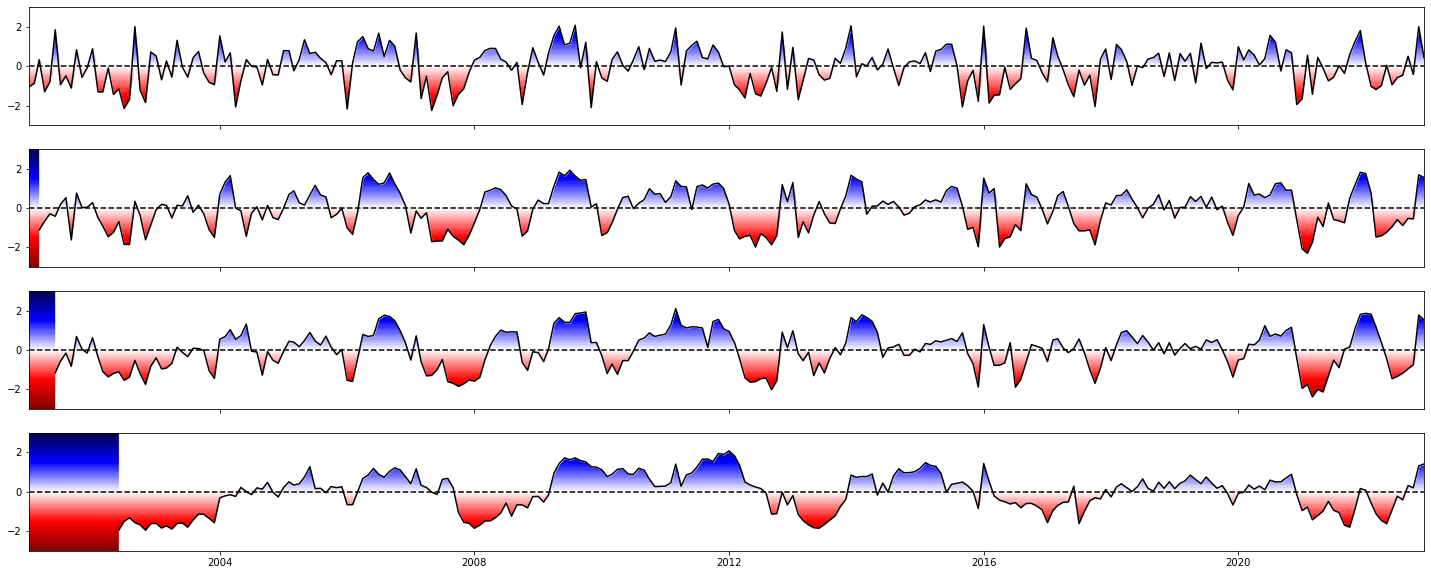

In [63]:
polygon_id = 7
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

<AxesSubplot: >

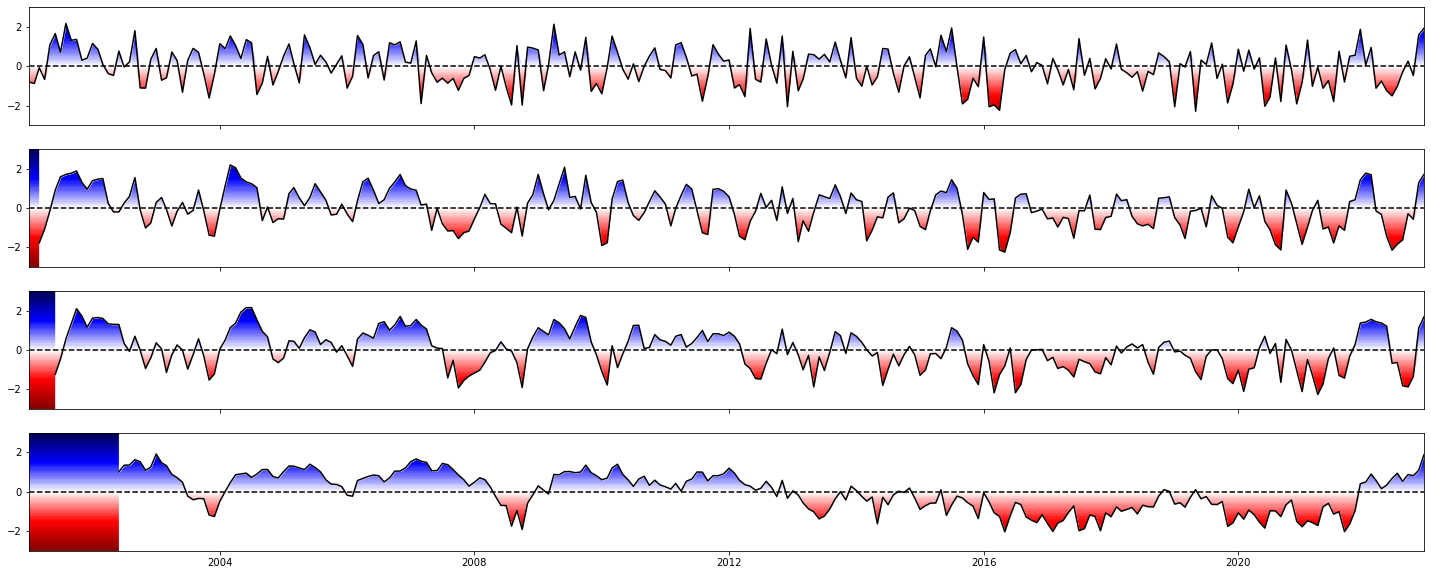

In [64]:
polygon_id = 8
f, ax = plt.subplots(4, 1, figsize=(25, 10), sharex=True)
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_1'].sort_index(), ax=ax[0])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_3'].sort_index(), ax=ax[1])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_6'].sort_index(), ax=ax[2])
si.plot.si(spei_data[spei_data.polygon_id==polygon_id]['spei_18'].sort_index(), ax=ax[3])

In [25]:
spei_data[(spei_data['polygon_id'] == 1) & (spei_data['spei_12'] < -2)]

,month,polygon_id,year,date,precipitation,radiation,temperature,fpar,PET,P-PET,spei_1,spei_3,spei_6,spei_9,spei_12,spei_18
datetime,,,,,,,,,,,,,,,,
2006-06-01,6,1,2006,06-06,270.249367,1.250413e+07,26.585639,85.508248,155.700875,114.548492,-1.279271,-2.171359,-1.453281,-1.644226,-2.069343,-1.915487
2018-09-01,9,1,2018,09-18,182.559946,1.632369e+07,29.932193,88.355238,194.034609,-11.474663,-1.292764,-1.523769,-1.688809,-1.866330,-2.012661,-2.224659
2006-10-01,10,1,2006,10-06,205.359809,1.610228e+07,29.055121,88.130543,160.965083,44.394726,-0.614496,-0.399629,-1.824631,-1.616779,-2.006978,-1.914610
2018-11-01,11,1,2018,11-18,289.470267,1.327646e+07,29.280689,87.465649,145.512974,143.957293,0.387572,-0.557394,-1.158428,-1.546408,-2.060776,-2.148269


In [50]:
num_months = []
polygons = [i for i in range(1,9)]

for polygon in range(1,9):
    num_months.append(len(spei_data[(spei_data['polygon_id'] == polygon) & (spei_data['spei_6'] < -2)]))

In [51]:
correlation = pd.DataFrame({'Polygon': polygons, 'Number of Months': num_months, 'Plant Area Index': pai})

In [33]:
gedi = pd.read_csv('../../data/interim/gedi_PAI_monthly_mean_per_polygon_4-2019_to_6-2022.csv', index_col=0)
pai = gedi.groupby('polygon_id').mean()['pai']

<AxesSubplot: xlabel='Number of Months', ylabel='Plant Area Index'>

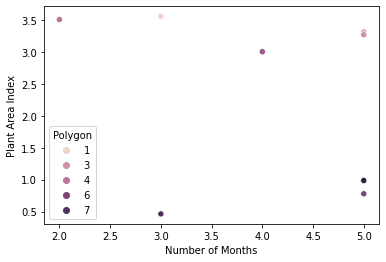

In [52]:
sns.scatterplot(data=correlation, x='Number of Months', y='Plant Area Index', hue='Polygon')

In [37]:
num_months

[4, 4, 4, 4, 4, 4, 4, 4]

In [ ]:
num_months = []
polygons = [i for i in range(1,9)]

for polygon in range(1,9):
    num_months.append(spei_data[(spei_data['polygon_id'] == polygon) & (spei_data['spei_12'] < -2)])